In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from skimage.transform import resize, rotate
import pandas as pd 
from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage import data
from skimage.feature._canny import canny
import cv2
import os

In [1]:
import glob
non_demented = glob.glob('../Alz_data/train/NonDemented/*.jpg')
mod_demented = glob.glob('../Alz_data/train/ModerateDemented/*.jpg')
mild_demented = glob.glob('../Alz_data/train/MildDemented/*.jpg')
very_mild_demented = glob.glob('../Alz_data/train/VeryMildDemented/*.jpg')

In [3]:
def array(filepath):
    x = np.array([np.array(Image.open(fname)) for fname in filepath])
    return x

In [4]:
nd = array(non_demented)

In [7]:
mild = array(mild_demented)

In [8]:
very_mild = array(very_mild_demented)

mod = array(mod_demented)

In [9]:
mod = array(mod_demented)

In [10]:
pre = [nd[0], very_mild[0], mild[0], mod[0]]

In [11]:
def graph_averages(imgs):    
    fig, axs = plt.subplots(2,2, figsize=(10,10), dpi=150)
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(imgs[idx], cmap="gray")
    axs[0,0].set_title('Non-Demented Average', fontsize=16)
    axs[0,1].set_title('Very Mild Demented Average', fontsize=16)
    axs[1,0].set_title('Mild Demented Average', fontsize=16)
    axs[1,1].set_title('Moderate Demented Average', fontsize=16)
    axs[0,0].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[0,1].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[1,0].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[1,1].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.tight_layout()
    plt.savefig('../images/4imgs_eda.jpg')
    plt.show()

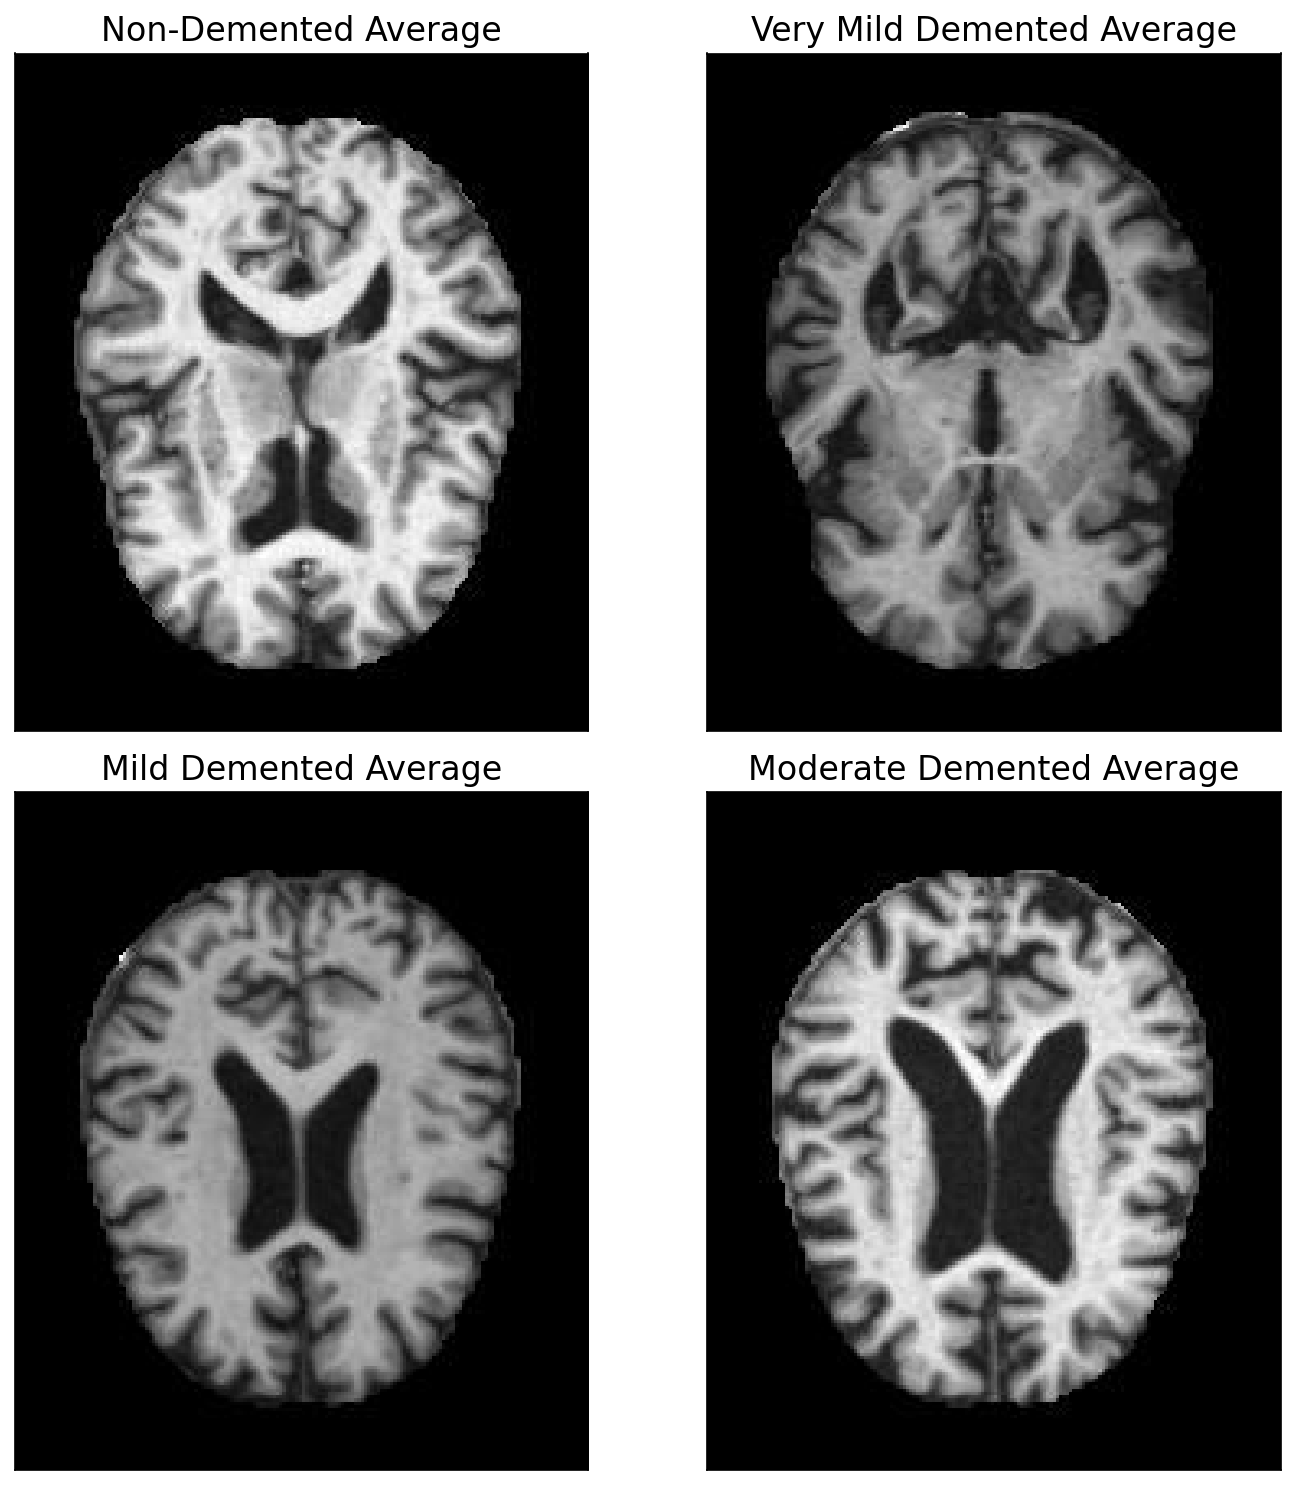

In [12]:
graph_averages(pre)

In [28]:
def graph_averages(imgs):    
    fig, axs = plt.subplots(1,2, figsize=(10,10))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(imgs[idx], cmap="gray")
    axs[0].set_title('Moderate Demented Average')
    axs[1].set_title('Non-Demented Average')
    axs[0].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[1].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.tight_layout()
    plt.savefig('../images/the_data.jpg')
    plt.show()

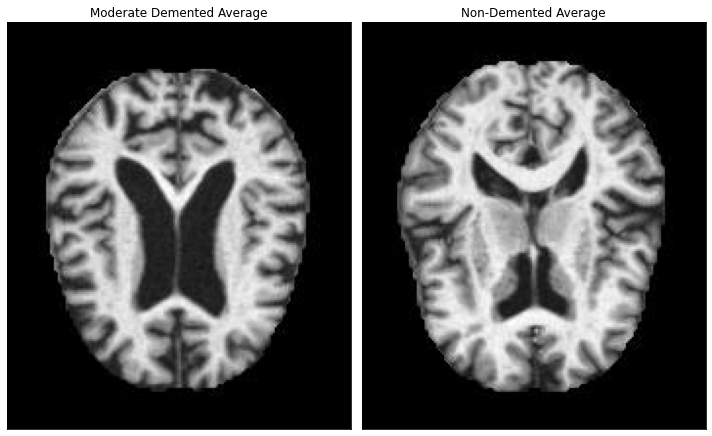

In [29]:
graph_averages(pre)

In [18]:
def files_to_array(name, filepath):
    """Takes the filepath of images and imports them. Output is into a numpy array """
    name = glob.glob(filepath)
    x = np.array([np.array(Image.open(fname)) for fname in filepath])
    return x


In [21]:
nd = files_to_array(non_demented, '../Alz_data/train/NonDemented/')

IsADirectoryError: [Errno 21] Is a directory: '.'

In [316]:
def resize_gray_mat(filelist):
    x = []
    for fname in filelist:
        vec = np.array(Image.open(fname))
        rs = resize(vec, (64,64))
        img = color.rgb2gray(rs)
        x.append(img)
    return np.array(x)

In [317]:
non_dom = resize_gray_mat(non_demented)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


In [7]:
mod_dem = resize_gray_mat(demented)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


In [8]:
def find_mean_img(full_mat, title):
    mean_img = full_mat.mean(axis = 0)
    plt.imshow(mean_img, cmap='Greys_r')
    plt.axis('off')
    plt.show()
    return mean_img

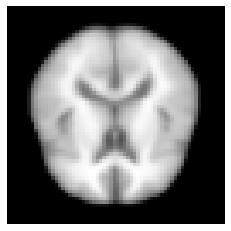

In [305]:
non_dem_avg = find_mean_img(non_dom, "Non Demented")

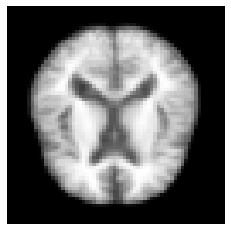

In [306]:
dem_avg = find_mean_img(mod_dem, "Demented")

In [307]:
averages = [dem_avg, non_dem_avg]

In [14]:
def graph_averages(imgs):    
    fig, axs = plt.subplots(1,2, figsize=(10,10))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(imgs[idx], cmap="gray")
    axs[0].set_title('Moderate Demented Average')
    axs[1].set_title('Non-Demented Average')
    axs[0].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[1].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.tight_layout()
    plt.savefig('../images/averages_of_brains.jpg')
    plt.show()


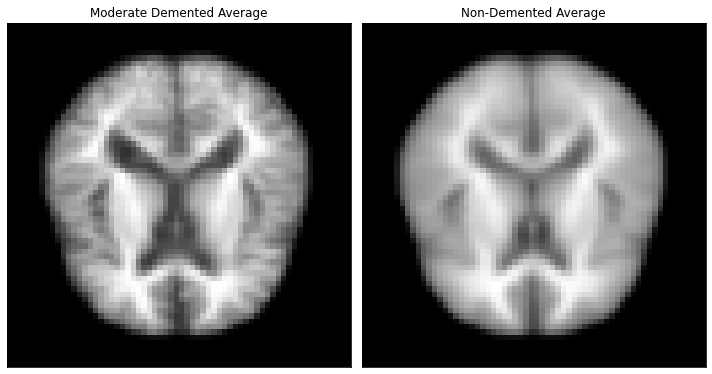

In [15]:
graph_averages(averages)

In [37]:
def contrast_mean(norm_mean, mod_mean):
    contrast_mean = norm_mean - mod_mean
    plt.imshow(contrast_mean, cmap='bwr')
    plt.title(f'Difference Between a Normal Brain & Moderate Dementia')
    plt.axis('off')
    plt.savefig('../images/contrast_mean')
    plt.show()

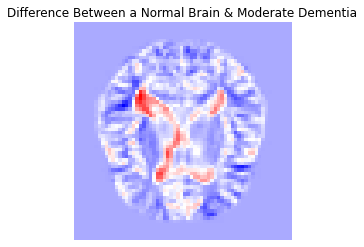

In [38]:
contrast_mean(non_dem_avg, dem_avg)

In [40]:
# from sklearn.decomposition import PCA
# from math import ceil

# def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
#     # fit PCA to describe n_comp * variability in the class
#     pca = PCA(n_components = n_comp, whiten = True)
#     pca.fit(full_mat)
#     print('Number of PC: ', pca.n_components_)
#     return pca
  
# def plot_pca(pca, size = (64, 64)):
#     # plot eigenimages in a grid
#     n = pca.n_components_
#     fig = plt.figure(figsize=(8, 8))
#     r = int(n**.5)
#     c = ceil(n/ r)
#     for i in range(n):
#         ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
#         ax.imshow(pca.components_[i].reshape(size), 
#                   cmap='Greys_r')
#     plt.axis('off')
#     plt.show()
    
# plot_pca(eigenimages(non_dom, 'NORMAL'))
# plot_pca(eigenimages(mod_dem, 'MODERATE DEMENTED'))

In [185]:
def make_gray(img):
    img = color.rgb2gray(img)
    return img   

def apply_sobel(img, mode='nearest'):
    return filters.sobel(img)

def apply_canny(img):
    return feature.canny(img, sigma=2, low_threshold=.1, high_threshold=.4)

def restoration_bi(img):
    return restoration.denoise_bilateral(img, sigma_spatial=.02, bins=1000, mode='edge')

def restoration_cham(img):
    return restoration.denoise_tv_chambolle(img, weight=.0001)





In [279]:
def graph_filters(img, title):    
    fig, axs = plt.subplots(2,2, figsize=(8,8))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(img[idx], cmap='gray')
    for ind, t in enumerate(title):
        ax.set_title(title[ind])
#     ax[1].set_title(f'{title} Canny Filter')
#     ax[2].set_title(f'{title} Sobel Filter')
#     ax[3].set_title(f'{title} Canny Filter')
    plt.savefig(f'../images/{title}.png')
    plt.show()
    


In [280]:
averages = [dem_avg, non_dem_avg]

In [281]:
non_d1 = [apply_sobel(non_dem_avg),
          apply_canny(non_dem_avg),
          restoration_bi(non_dem_avg),
          restoration_cham(non_dem_avg)]


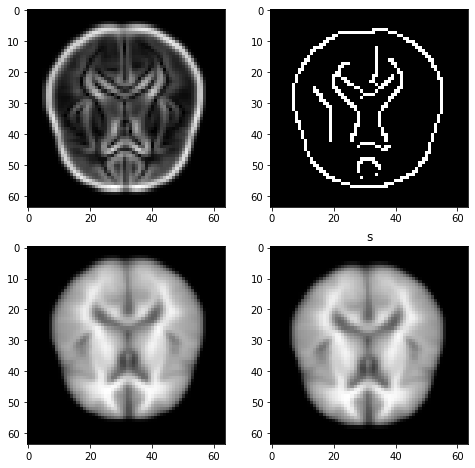

In [282]:
graph_filters(non_d1, "Non Demented Brains")

In [294]:
dem_d1 = [apply_sobel(dem_avg),
          apply_canny(dem_avg),
          restoration_bi(dem_avg),
          restoration_cham(dem_avg)]

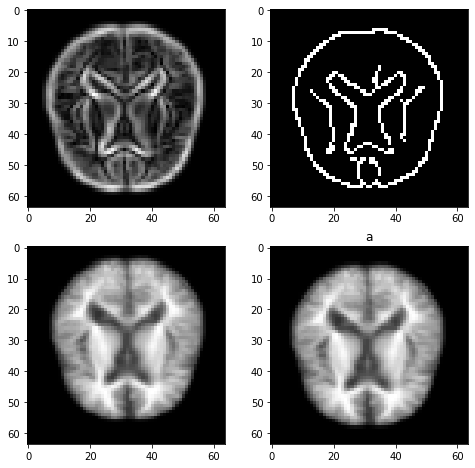

In [296]:
graph_filters(dem_d1, 'Moderate Dementia')

In [297]:
canny = [apply_canny(dem_avg), apply_canny(non_dem_avg)]

In [301]:
def graph_filters(imgs):    
    fig, axs = plt.subplots(1,2, figsize=(10,10))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(imgs[idx])
    axs[0].set_title('Moderate Demented Canny')
    axs[1].set_title('Non-Demented Canny')
    axs[0].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[1].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.tight_layout()
    plt.savefig('../images/canny_filtersjpg')
    plt.show()


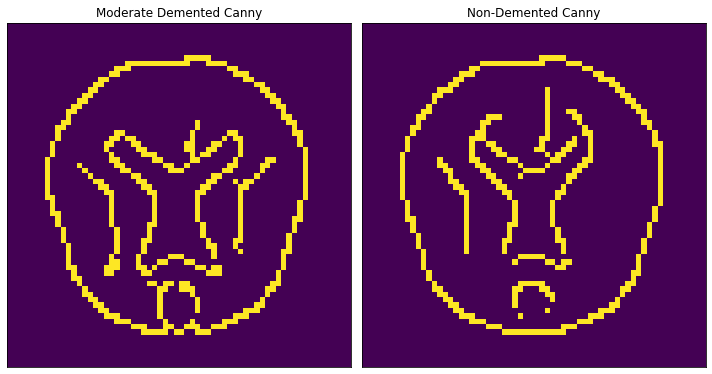

In [302]:
graph_filters(canny)

In [291]:
from sklearn.cluster import KMeans
def cluster(image, n_clusters, random_state):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(image)
    clusters = dem2show = kmeans.cluster_centers_[kmeans.labels_]
    final = clusters.reshape(image.shape[0], image.shape[1])
    return io.imshow(final)


/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (64). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


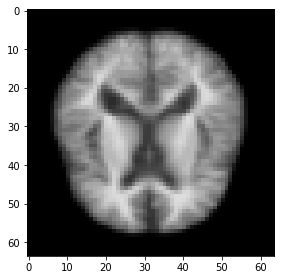

In [292]:
mod_clus = cluster(dem_avg, 64, 0)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (64). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


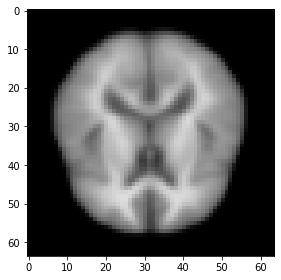

In [304]:
mod_clus = cluster(non_dem_avg, 64, 0)

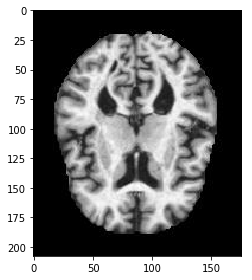

In [43]:
new_non = non_dem.resize(-1, 64, 64)

In [44]:
new_non.shape

(22880, 64, 64)

In [79]:
def reshape(images):
    arrays = []
    for image in non_dem:
        arrays.append(image.reshape(200,200))
    return arrays

In [80]:
reshape(non_dem)

ValueError: cannot reshape array of size 36608 into shape (200,200)

In [9]:
mod_dem.shape

(52, 208, 176)

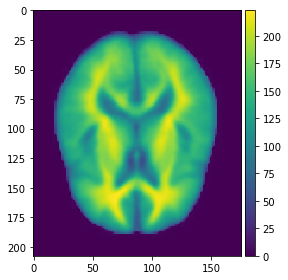

In [30]:
avg_nd = non_dem.mean(axis=0)
io.imshow(avg_nd)

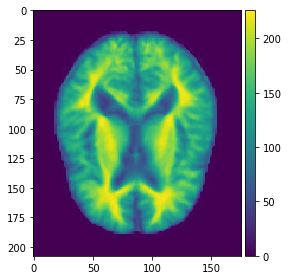

In [11]:
avg_mod = mod_dem.mean(axis=0)
io.imshow(avg_mod)

In [303]:
averages = [avg_mod, avg_nd]

NameError: name 'avg_mod' is not defined

In [40]:
grey_mod = rgb2gray(mod_dem[10])

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


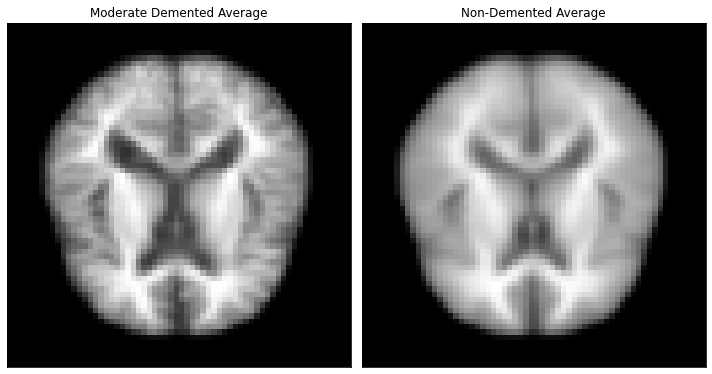

In [309]:
def graph_averages(imgs):    
    fig, axs = plt.subplots(1,2, figsize=(10,10))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(imgs[idx], cmap='gray')
    axs[0].set_title('Moderate Demented Average')
    axs[1].set_title('Non-Demented Average')
    axs[0].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[1].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.tight_layout()
    plt.savefig('../images/averages_of_brains.jpg')
    plt.show()
graph_averages(averages)

In [46]:
from skimage.color import rgb2gray

def compare_mri(imgs):
    greyed = []
    for image in imgs:
        greyed.append(rgb2gray(image))
    fig, axs = plt.subplots(1,2, figsize=(10,10))
    for idx, ax in enumerate(axs.flatten()):
        io.imshow(greyed[idx])
    axs[0].set_title('Moderate Demented Average')
    axs[1].set_title('Non-Demented Average')
    axs[0].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[1].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.tight_layout()
    plt.savefig('../images/comparison_prior.jpg')
    plt.show()

    

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


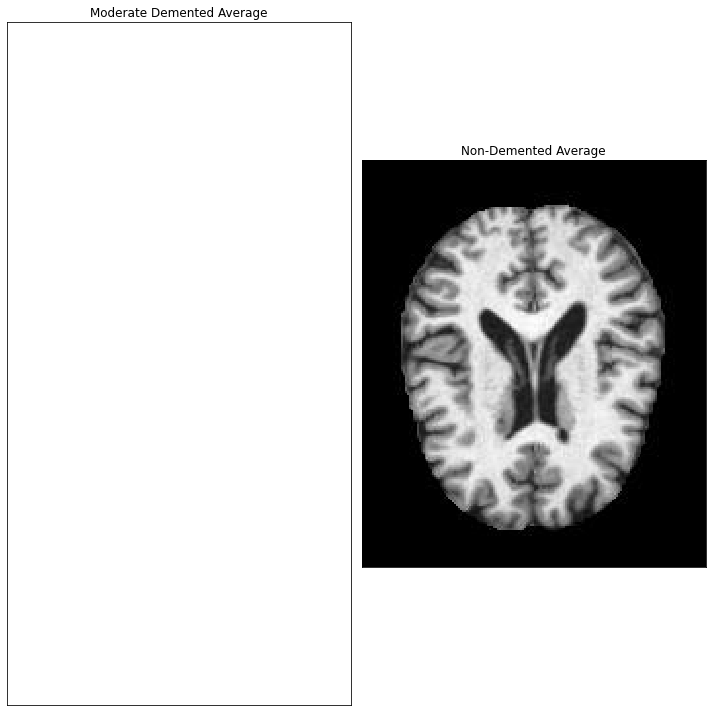

In [48]:
data = [mod_dem[10], non_dem[10]]
compare_mri(data)

In [ ]:
files = os.listdir(f'{self.folder_path}{folder}/')

In [ ]:
non_array = np.array([np.array(filelist)])

In [ ]:
non_array

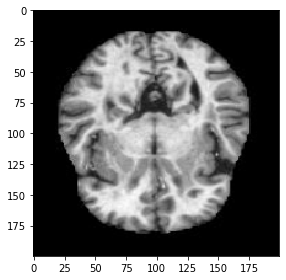

In [45]:
io.imshow(n1)

In [ ]:
x = np.array([np.array(Image.open(fname)) for fname in '../Alzheimer_s Dataset/train/NonDemented'])

In [ ]:
io.imshow(np_img2.reshape(image_size, image_size))

In [ ]:
avg = np_img2.mean(axis=1)

In [ ]:
io.imshow(avg.reshape(1,-1))

FileNotFoundError: [Errno 2] No such file or directory: 'Alz_data/train/ModerateDemented/moderateDem0.jpg'

In [41]:
n1 = read_and_resize('../Alz_data/train/NonDemented/nonDem0.jpg')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
array = np.array(images)
array[1]

In [ ]:
n1.shape

In [ ]:
i1

In [ ]:
i1.shape

k means clustering 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(i1)
dem2show = kmeans.cluster_centers_[kmeans.labels_]

In [ ]:
cluster_i1 = dem2show.reshape(i1.shape[0], i1.shape[1])
io.imshow(cluster_i1)

In [ ]:
non2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_non = non2show.reshape(n1.shape[0], n1.shape[1])
io.imshow(cluster_non)

In [ ]:
def apply_kmeans(image):
    # Getting a list of all RBG pixels in an image
    nrow, ncol = image.shape 
    lst_of_pixels = [image[irow][icol] for irow in range(nrow) for icol in range(ncol)]
    return lst_of_pixels


In [ ]:
nd1 = apply_kmeans(n1)


Edge Detection 

In [ ]:
def make_gray(img):
    img = color.rgb2gray(img)
    return img   

def apply_sobel(img):
    return filters.sobel(img)

def apply_canny(img):
    return feature.canny(img, sigma=2)

def restoration_bi(img):
    return restoration.denoise_bilateral(img, sigma_spatial=2)

def restoration_cham(img):
    return restoration.denoise_tv_chambolle(img, weight=.2)

images = [i1, n1]


In [ ]:
n_sobel = apply_sobel(n1)
io.imshow(n_sobel)

In [ ]:
def graph_filters(img):    
    fig, axs = plt.subplots(2,2, figsize=(8,8))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(img[idx])
    plt.show()
    
graph_filters(non_dems)

In [ ]:
n_laplace = laplace(n1)
io.imshow(n_laplace)

In [ ]:
i_sobel = apply_sobel(i1)
io.imshow(i_sobel)

In [ ]:
n_canny = apply_canny(n1)
io.imshow(n_canny)

In [ ]:
n_rest_bi = restoration_bi(n1)
io.imshow(n_rest_bi)

In [ ]:
n_rest_cham = restoration_cham(n1)
io.imshow(n_rest_cham)

In [ ]:
non_dems = [n_sobel, n_canny, n_rest_bi, n_rest_cham]

In [ ]:
def graph_filters(img):    
    fig, axs = plt.subplots(2,2, figsize=(8,8))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(img[idx])
    plt.show()
    
graph_filters(non_dems)

In [ ]:
i_rest_bi = restoration_bi(i1)
i_rest_cham = restoration_cham(i1)

In [ ]:
dem = [i_sobel, i_canny, i_rest_bi, i_rest_cham]
graph_filters(dem)

In [ ]:
i_canny = apply_canny(i1)

In [ ]:
io.imshow(i_canny)



In [ ]:
io.imshow(i_rest_bi)

In [ ]:
io.imshow(i_rest_cham)

In [ ]:
sobel_img = filters.sobel(img)
io.imshow(sobel_img);

In [ ]:
from skimage.filters import gaussian
io.imshow(gaussian(d1, sigma=3));

In [ ]:
d1 = io.imread('Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg')

In [ ]:
d2 = io.imread('Alzheimer_s Dataset/train/ModerateDemented/moderateDem1.jpg')

In [ ]:
d1

In [ ]:
d1.shape

In [ ]:
d2.shape

In [ ]:
non_dem = io.imread_collection('Alzheimer_s Dataset/train/ModerateDemented')

In [ ]:
non_demented = np.load('Alzheimer_s Dataset/train/NonDemented')

In [ ]:
nondem1_values = np.ravel(d1)
nondem1_values.shape

In [ ]:
def plot_values_histogram():
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111) 
    ax.hist(nondem1_values, bins=256) 
    ax.set_xlabel('Pixel Intensities', fontsize=14) 
    ax.set_ylabel('Frequency in Image', fontsize=14) 
    ax.set_title("Image Histogram", fontsize=16);

In [ ]:
plot_values_histogram()

In [ ]:
def plot_images(imgs, save_title='imgs.png', show = False):
    '''
    Input: Dictionary of images, plotting options. 
    Output: Plot of 2-4 images.  
    '''
    
#     if len(imgs) == 2:
#         fig, axs = plt.subplots(1,2, figsize=(8, 8))
#     elif len(imgs) == 4:
#         fig, axs = plt.subplots(2,2, figsize=(8, 8))
#     else:
#         raise ValueError("Plot function requires 2 or 4 items.")
    for ax, k, v in zip(axs.flatten(), imgs.keys(), imgs.values()): 
        ax.imshow(v, cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title('Image ' + k)
    fig.savefig(save_title)
    if show: 
        plt.show()

In [ ]:
#logistic regression 

In [ ]:
non_demented = '../Alzheimer_s Dataset/train/NonDemented'
moderate = '../Alzheimer_s Dataset/train/ModerateDemented'

In [ ]:
image_size = 120

for image in tqdm(os.listdir(moderate)): 
    path = os.path.join(moderate, image)
    img = cv.imread(path, cv.IMREAD_GRAYSCALE) 
    img = cv.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(non_demented)): 
    path = os.path.join(non_demented, image2)
    img2 = cv.imread(path, cv.IMREAD_GRAYSCALE) 
    img2 = cv.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Moderate Demented and Non Demented Brain Scans")

In [ ]:
image_size = 120

In [ ]:
def train_data():
    non_demented_train = [] 
    moderate_dem_train=[]
    for image1 in tqdm(os.listdir(non_demented)): 
        path = os.path.join(non_demented, image)
        img1 = cv.imread(path, cv.IMREAD_GRAYSCALE) 
        img1 = cv.resize(img1, (image_size, image_size))
        non_demented_train.append(img1) 
    for image2 in tqdm(os.listdir(moderate)): 
        path = os.path.join(moderate, image)
        img2 = cv.imread(path, cv.IMREAD_GRAYSCALE) 
        img2 = cv.resize(img2, (image_size, image_size))
        moderate_dem_train.append(img2) 
    
    train_data= np.concatenate((np.asarray(non_demented_train),np.asarray(moderate_dem_train)),axis=0)
    return train_data 

In [ ]:
train_data = train_data()